## Model Training

1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3268
- Mean Absolute Error: 4.2781
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4108
- Mean Absolute Error: 4.2279
- R2 Score: 0.8797


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806




c:\Users\rubyb\Desktop\MLOps and Deployment\mlproject\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rubyb\Desktop\MLOps and Deployment\mlproject\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\rubyb\Desktop\MLOps and Deployment\mlproject\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\rubyb\Desktop\MLOps and Deployment\mlproject\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\rubyb\Desktop\MLOps and Deployment\mlp

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7122
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2516
- Mean Absolute Error: 5.6160
- R2 Score: 0.7839


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3111
- Mean Absolute Error: 6.6450
- R2 Score: 0.7161


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2884
- Mean Absolute Error: 1.8172
- R2 Score: 0.9768
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0014
- Mean Absolute Error: 4.6453
- R2 Score: 0.8520


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
--

Insight (from Research)

![alt text](image.png)

Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879689
8,AdaBoost Regressor,0.852243
5,Random Forest Regressor,0.851988
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.716136


Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.97


Plot y_pred and y_test

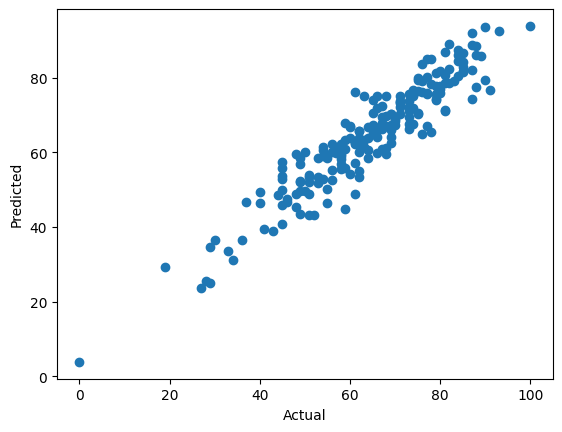

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

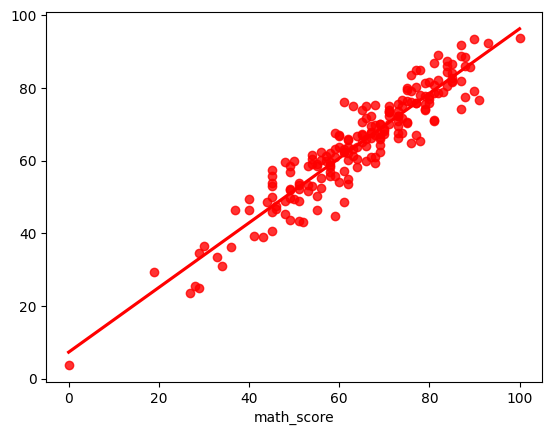

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.734375,14.265625
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.156250,8.843750
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750


plot of actual value vs predicted value vs diff (from research)

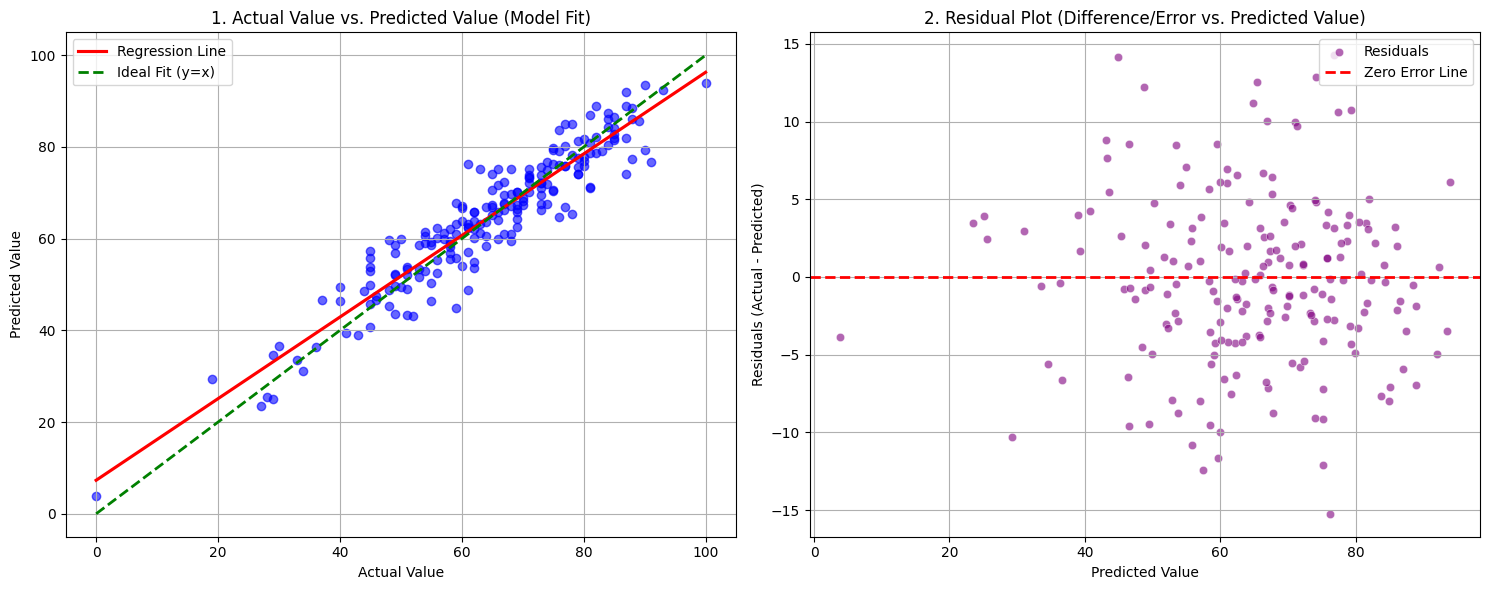

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# The DataFrame creation from your prompt (assuming y_test and y_pred are defined):
# pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})

# Create a figure with two subplots for comprehensive analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -------------------------------------------------------------
# --- Plot 1: Actual vs. Predicted Value (The Model Fit Plot) ---
# -------------------------------------------------------------
# Use label in scatter_kws to label the data points
sns.regplot(x='Actual Value', y='Predicted Value', data=pred_df, ci=None, 
            scatter_kws={'alpha': 0.6, 'color': 'blue', 'label': 'Predicted Points'}, 
            line_kws={'color': 'red', 'label': 'Regression Line'}, ax=axes[0])

# Add the ideal y=x line (where Actual equals Predicted)
# Use a label here for the ideal fit
axes[0].plot([pred_df['Actual Value'].min(), pred_df['Actual Value'].max()], 
             [pred_df['Actual Value'].min(), pred_df['Actual Value'].max()], 
             color='green', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

axes[0].set_title('1. Actual Value vs. Predicted Value (Model Fit)')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')
axes[0].grid(True)
# Add the legend to the first subplot
axes[0].legend(loc='upper left')


# -------------------------------------------------------------
# --- Plot 2: Residual Plot (Difference vs. Predicted Value) ---
# -------------------------------------------------------------
# Add label for the residuals scatter
sns.scatterplot(x='Predicted Value', y='Difference', data=pred_df, 
                color='purple', alpha=0.6, label='Residuals', ax=axes[1])

# Add the ideal zero-error line (the target)
# Add label for the zero error line
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

axes[1].set_title('2. Residual Plot (Difference/Error vs. Predicted Value)')
axes[1].set_xlabel('Predicted Value')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].grid(True)
# Add the legend to the second subplot
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

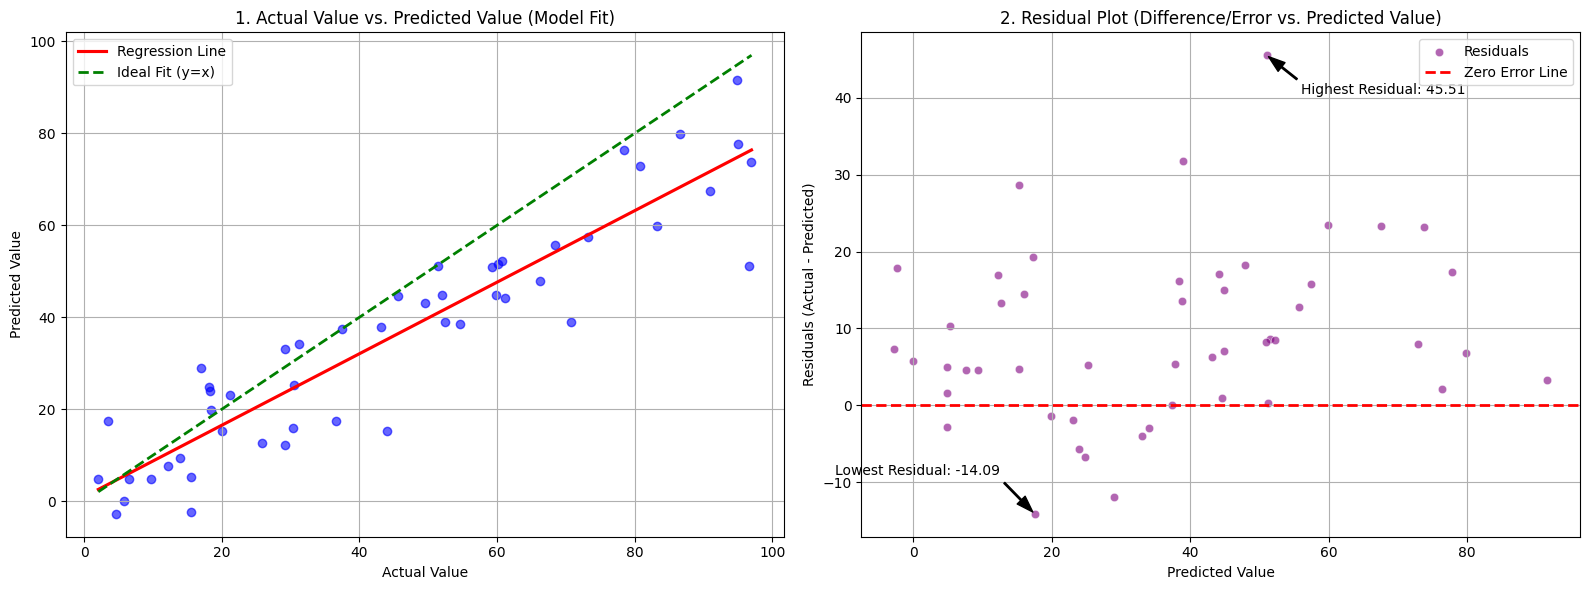

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume y_test and y_pred are defined.
# Placeholder definition for demonstration purposes (DELETE THIS LINE AND THE NEXT BLOCK 
# IF YOUR pred_df IS ALREADY DEFINED FROM ACTUAL DATA)
# -------------------------------------------------------------------------------------
# np.random.seed(42)
# y_test = np.random.rand(100) * 100
# y_pred = y_test + np.random.randn(100) * 10
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
# -------------------------------------------------------------------------------------


# --- 1. Find the Highest and Lowest Residuals ---
max_residual_point = pred_df.loc[pred_df['Difference'].idxmax()]
min_residual_point = pred_df.loc[pred_df['Difference'].idxmin()]

# Create a figure with two subplots for comprehensive analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Increased figsize width slightly for annotation space

# -------------------------------------------------------------
# --- Plot 1: Actual vs. Predicted Value (The Model Fit Plot) ---
# -------------------------------------------------------------
sns.regplot(x='Actual Value', y='Predicted Value', data=pred_df, ci=None, 
            scatter_kws={'alpha': 0.6, 'color': 'blue', 'label': 'Predicted Points'}, 
            line_kws={'color': 'red', 'label': 'Regression Line'}, ax=axes[0])

# Add the ideal y=x line (where Actual equals Predicted)
axes[0].plot([pred_df['Actual Value'].min(), pred_df['Actual Value'].max()], 
             [pred_df['Actual Value'].min(), pred_df['Actual Value'].max()], 
             color='green', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

axes[0].set_title('1. Actual Value vs. Predicted Value (Model Fit)')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')
axes[0].grid(True)
axes[0].legend(loc='upper left')


# -------------------------------------------------------------
# --- Plot 2: Residual Plot (Difference vs. Predicted Value) ---
# -------------------------------------------------------------
sns.scatterplot(x='Predicted Value', y='Difference', data=pred_df, 
                color='purple', alpha=0.6, label='Residuals', ax=axes[1])

# Add the ideal zero-error line (the target)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

# --- ANNOTATION FOR MAX RESIDUAL ---
axes[1].annotate(
    f'Highest Residual: {max_residual_point["Difference"]:.2f}',
    xy=(max_residual_point['Predicted Value'], max_residual_point['Difference']), # Point to annotate
    xytext=(max_residual_point['Predicted Value'] + 5, max_residual_point['Difference'] - 5), # Text position
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=10,
    ha='left'
)

# --- ANNOTATION FOR MIN RESIDUAL ---
axes[1].annotate(
    f'Lowest Residual: {min_residual_point["Difference"]:.2f}',
    xy=(min_residual_point['Predicted Value'], min_residual_point['Difference']), # Point to annotate
    xytext=(min_residual_point['Predicted Value'] - 5, min_residual_point['Difference'] + 5), # Text position
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=10,
    ha='right'
)

axes[1].set_title('2. Residual Plot (Difference/Error vs. Predicted Value)')
axes[1].set_xlabel('Predicted Value')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].grid(True)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

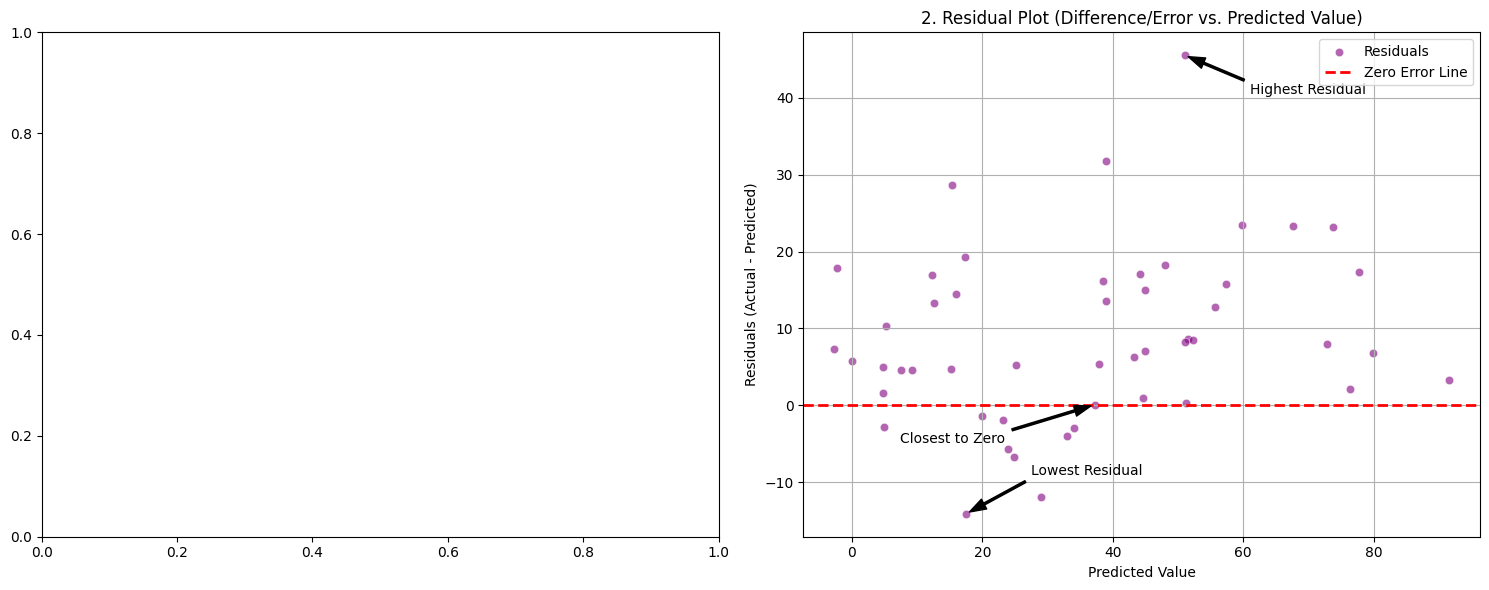

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Code to find extreme residuals (Run BEFORE plotting) ---

# Highest Residual (Max Difference)
max_diff_idx = pred_df['Difference'].idxmax()
max_diff_x = pred_df.loc[max_diff_idx, 'Predicted Value']
max_diff_y = pred_df.loc[max_diff_idx, 'Difference']

# Lowest Residual (Min Difference - most negative)
min_diff_idx = pred_df['Difference'].idxmin()
min_diff_x = pred_df.loc[min_diff_idx, 'Predicted Value']
min_diff_y = pred_df.loc[min_diff_idx, 'Difference']

# Closest to Zero Residual (Min Absolute Difference)
zero_diff_idx = (pred_df['Difference']).abs().idxmin()
zero_diff_x = pred_df.loc[zero_diff_idx, 'Predicted Value']
zero_diff_y = pred_df.loc[zero_diff_idx, 'Difference']

# --- Plotting Code with Annotations ---

# Create a figure with two subplots for comprehensive analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -------------------------------------------------------------
# --- Plot 1: Actual vs. Predicted Value (The Model Fit Plot) ---
# -------------------------------------------------------------
# ... (Code for Plot 1 remains the same)

# -------------------------------------------------------------
# --- Plot 2: Residual Plot (Difference vs. Predicted Value) ---
# -------------------------------------------------------------
sns.scatterplot(x='Predicted Value', y='Difference', data=pred_df, 
                color='purple', alpha=0.6, label='Residuals', ax=axes[1])

axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

# --- ANNOTATIONS ADDED HERE ---

# 1. Highest Residual (Positive Outlier)
axes[1].annotate('Highest Residual',
                 # xy is the coordinate of the point to annotate
                 xy=(max_diff_x, max_diff_y), 
                 # xytext is where the label text will be placed
                 xytext=(max_diff_x + 10, max_diff_y - 5), 
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                 fontsize=10, color='black')

# 2. Lowest Residual (Negative Outlier)
axes[1].annotate('Lowest Residual',
                 xy=(min_diff_x, min_diff_y), 
                 xytext=(min_diff_x + 10, min_diff_y + 5),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                 fontsize=10, color='black')

# 3. Closest to Zero Residual (Best Prediction)
axes[1].annotate('Closest to Zero',
                 xy=(zero_diff_x, zero_diff_y), 
                 xytext=(zero_diff_x - 30, zero_diff_y - 5),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                 fontsize=10, color='black')

# --- END ANNOTATIONS ---

axes[1].set_title('2. Residual Plot (Difference/Error vs. Predicted Value)')
axes[1].set_xlabel('Predicted Value')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].grid(True)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()